In [18]:
# Libraries imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the sample dataset
df = pd.read_csv('/Users/salnaqeeb/Downloads/bq-results-20230321-215404-1679435672783.csv')

In [3]:
df.head()

,timestamp,tiemstamp_AEST,date_AEST,distance,enhanced_altitude,ascent,grade,calories,enhanced_speed,heart_rate,temperature,cadence,power,gps_accuracy,sessionID,userID,age,gender,weight,FTP
0,2022-10-30 21:53:38+00:00,2022-10-31 08:53:38 UTC,2022-10-31,17.73928,391.4,496.0,-6.55,626.0,32.9688,137.0,NaN,57.0,43.0,3.0,NaN,U1000000,33,MALE,80,301
1,2022-11-04 07:08:03+00:00,2022-11-04 18:08:03 UTC,2022-11-04,0.03105,43.4,0.0,-1.18,0.0,19.9692,114.0,16.0,55.0,30.0,2.0,NaN,U1000000,33,MALE,80,301
2,2022-11-04 21:18:58+00:00,2022-11-05 08:18:58 UTC,2022-11-05,13.12674,55.6,72.0,0.00,306.0,34.5816,186.0,11.0,99.0,306.0,2.0,NaN,U1000000,33,MALE,80,301
3,2022-11-04 22:29:52+00:00,2022-11-05 09:29:52 UTC,2022-11-05,47.57553,73.6,620.0,0.00,1283.0,36.2304,167.0,14.0,102.0,228.0,2.0,NaN,U1000000,33,MALE,80,301
4,2022-11-04 23:52:37+00:00,2022-11-05 10:52:37 UTC,2022-11-05,90.03022,38.8,1044.0,-0.03,2287.0,36.9792,168.0,21.0,99.0,94.0,3.0,NaN,U1000000,33,MALE,80,301


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544672 entries, 0 to 1544671
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   timestamp          1544672 non-null  object 
 1   tiemstamp_AEST     1544672 non-null  object 
 2   date_AEST          1544672 non-null  object 
 3   distance           1544672 non-null  float64
 4   enhanced_altitude  1534857 non-null  float64
 5   ascent             1535138 non-null  float64
 6   grade              1534675 non-null  float64
 7   calories           1466821 non-null  float64
 8   enhanced_speed     1544664 non-null  float64
 9   heart_rate         1277632 non-null  float64
 10  temperature        504910 non-null   float64
 11  cadence            1528179 non-null  float64
 12  power              1442041 non-null  float64
 13  gps_accuracy       1544664 non-null  float64
 14  sessionID          0 non-null        float64
 15  userID             1544672 non-n

In [27]:
# 1. Each ride =+ 1p
# 2. Riding more than once a day =+ 1p
# 3. Riding in consecutive days =+ 2p
# 4. Most rides in a week =+ 2p
# 5. Riding after being inactive for 7 days =+ 5p
# 6. Not riding for three consecutive days =- 1p

# Columns needed: "date_AEST", "distance", and "userID".

In [6]:
# Removing unneccessary columns after determining what we need.
df = df.drop(columns=['timestamp',
                      'tiemstamp_AEST',
                      'enhanced_altitude',
                      'ascent',
                      'grade',
                      'calories',
                      'enhanced_speed',
                      'heart_rate',
                      'temperature',
                      'cadence',
                      'power',
                      'gps_accuracy',
                      'sessionID',
                      'age',
                      'gender',
                      'weight',
                      'FTP'
                      ])

In [7]:
df.head(10)

,date_AEST,distance,userID
0,2022-10-31,17.73928,U1000000
1,2022-11-04,0.03105,U1000000
2,2022-11-05,13.12674,U1000000
3,2022-11-05,47.57553,U1000000
4,2022-11-05,90.03022,U1000000
5,2022-11-05,97.87013,U1000000
6,2022-11-09,10.08146,U1000000
7,2022-11-09,22.90761,U1000000
8,2022-11-11,30.06810,U1000000
9,2022-11-11,33.59293,U1000000


In [11]:
# Calculate summary statistics for the distance column

summary_stats = df['distance'].describe()
print(summary_stats)

count    1.544672e+06
mean     2.382948e+01
std      2.257438e+01
min      0.000000e+00
25%      7.652583e+00
50%      1.793081e+01
75%      3.202525e+01
max      1.669949e+02
Name: distance, dtype: float64


In [12]:
# Calculate total distance per user

total_distance_per_user = df.groupby('userID')['distance'].sum()
print(total_distance_per_user)

userID
U1000000    3.680873e+07
Name: distance, dtype: float64


In [17]:
# Calculate daily total distance

daily_distance = df.groupby('date_AEST')['distance'].sum()
print(daily_distance)

date_AEST
2021-03-10    260868.97316
2021-03-12     10392.46500
2021-03-14    310719.06740
2021-03-15      3851.53559
2021-03-16    104649.45058
                  ...     
2022-11-13     30337.24439
2022-11-16     70205.94277
2022-11-17    113625.24212
2022-11-18     92298.30406
2022-11-19    200256.99544
Name: distance, Length: 309, dtype: float64


In [22]:
# Calculate average distance per ride
average_distance_per_ride = df['distance'].mean()

print("Average Distance per Ride:", average_distance_per_ride)

Average Distance per Ride: 23.829478984444965


In [23]:
rides_per_user = df['userID'].value_counts()

print("Number of Rides per User:")
print(rides_per_user)

Number of Rides per User:
U1000000    1544672
Name: userID, dtype: int64


In [8]:
# Number of sessions in one day. Example (2022-11-05)

filtered_df = df.loc[(df['date_AEST'] >= '2022-11-05')
                    & (df['date_AEST'] < '2022-11-06')]

print('Number of sessions on 2022-11-05: ')
print(len(filtered_df))
filtered_df.head(10)

Number of sessions on 2022-11-05: 
12011


,date_AEST,distance,userID
2,2022-11-05,13.12674,U1000000
3,2022-11-05,47.57553,U1000000
4,2022-11-05,90.03022,U1000000
5,2022-11-05,97.87013,U1000000
90,2022-11-05,28.17804,U1000000
91,2022-11-05,38.80094,U1000000
92,2022-11-05,38.91653,U1000000
93,2022-11-05,49.36557,U1000000
94,2022-11-05,72.48362,U1000000
95,2022-11-05,75.98391,U1000000


In [9]:
# Distance cut in one day. Example (2022-11-05)

dis = filtered_df['distance'].sum()
print(dis)

613759.21385


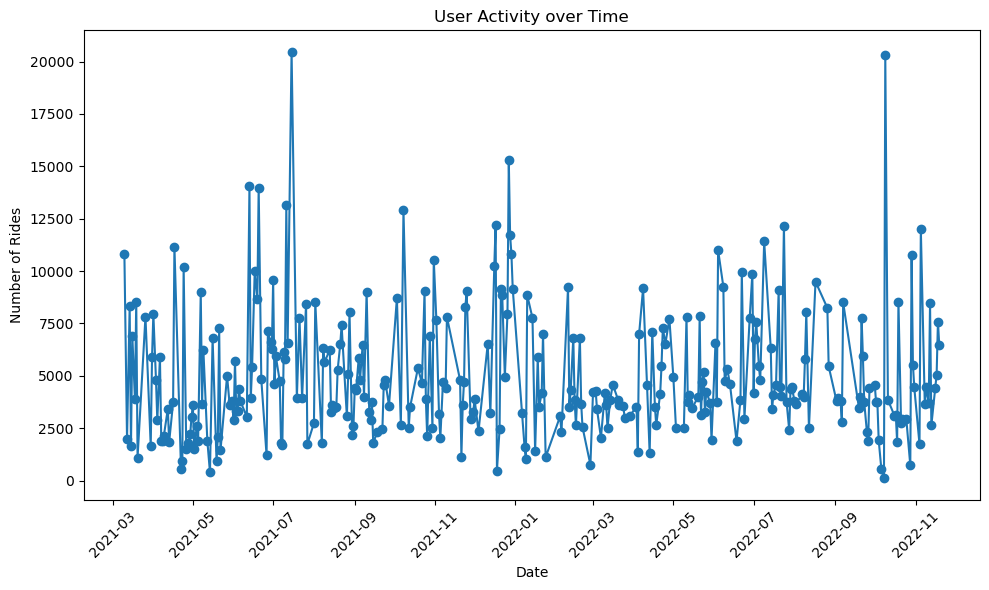

In [19]:
# Group the data by date and count the number of rides or sum the distance
activity_over_time = df.groupby('date_AEST').size()

# Create a line plot of user activity over time
plt.figure(figsize=(10, 6))
plt.plot(activity_over_time.index, activity_over_time.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('User Activity over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Extract the day of the week from the date
df['day_of_week'] = df['date_AEST'].dt.day_name()

# Calculate metrics per day of the week
average_distance_per_day = df.groupby('day_of_week')['distance'].mean()
rides_per_day = df['day_of_week'].value_counts()

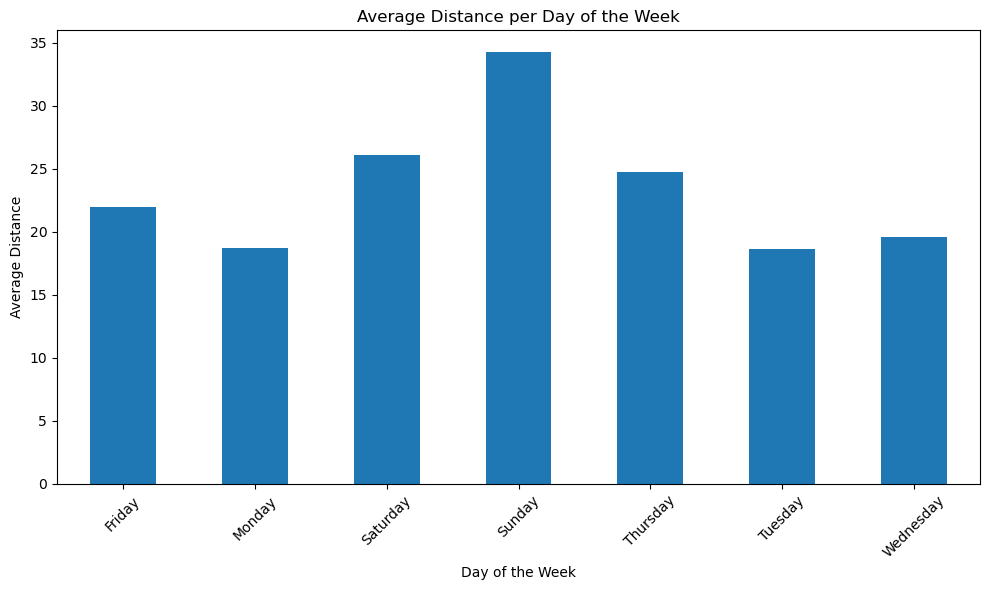

Number of Rides per Day:
Saturday     249140
Sunday       245427
Friday       243396
Wednesday    215834
Thursday     214550
Tuesday      197899
Monday       178426
Name: day_of_week, dtype: int64


In [26]:
# Plotting the average distance per day
plt.figure(figsize=(10, 6))
average_distance_per_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Distance')
plt.title('Average Distance per Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the number of rides per day
print("Number of Rides per Day:")
print(rides_per_day)